# About this project


Spam messages are unsolicited and unwanted messages. Fraudsters use spam messages to trick people into giving them your personal information — things like your password, account number, or even credit card information.

These messages are designed in such a way people fall for it. This is because it is difficult for people with little knowledge about scams to determine if sms is from a scammer.



In this project, I will build an application that can help determine if an SMS is spam or not. The project is all about teaching the computer how to classify SMS as spam or not spam in order to help us determine whether an SMS is spam or not. To do that, I will use the **Multinomial Naive Bayes algorithm** along with a dataset of 5,572 SMS messages that are already classified by humans.

For this project, my goal is to create a spam filter that classifies new messages with an accuracy greater than 80% — so i expect that more than 80% of the new messages will be classified correctly as spam or ham (non-spam).

THIS IS A MACHINE LEARNING CLASSIFICATION PROBLEM


In [84]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from sklearn.feature_extraction import DictVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

### Exploratory Data analysis (EDA)

In [54]:
#read the sms data
data=pd.read_csv("SMSSpamCollection",sep='\t',header=None,names=['Label', 'SMS'])

In [55]:
data.shape

(5572, 2)

In [56]:
data.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
(data["Label"]=="ham").value_counts(normalize=True)

True     0.865937
False    0.134063
Name: Label, dtype: float64

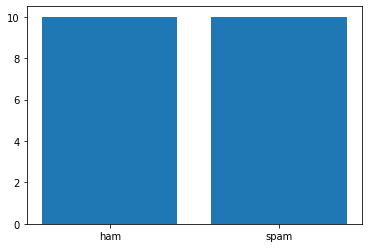

In [86]:
## Vizualise the class imbalance
plt.bar(data["Label"],height=10)
plt.show()


### Observation: 
- The data set has two columns Label and sms.
- The label column has two unique values ham(not spam) and Spam. 
- The SMS column contains different unique messages. This messages are labled on the label column.
- The data has 5572 rows
- Almost 87% of the SMS messages are classified as Non - Spam (ham) and the remaining 13% are classified as Spam.

In [58]:
## Randomise the dataset
randomised_data=data.sample(frac=1,random_state=1)
randomised_data

,Label,SMS
1078,ham,"Yep, by the pretty sculpture"
4028,ham,"Yes, princess. Are you going to make me moan?"
958,ham,Welp apparently he retired
4642,ham,Havent.
4674,ham,I forgot 2 ask ü all smth.. There's a card on ...
...,...,...
905,ham,"We're all getting worried over here, derek and..."
5192,ham,Oh oh... Den muz change plan liao... Go back h...
3980,ham,CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...
235,spam,Text & meet someone sexy today. U can find a d...


In [59]:
#convert the target(label) to numerical feature
randomised_data.Label=(randomised_data.Label=="spam").astype(int)

In [60]:
data_train,data_test=train_test_split(randomised_data,test_size=0.2,random_state=1)

In [61]:
y_train=data_train["Label"]
y_test=data_test["Label"]

In [62]:
del data_train["Label"]
del data_test["Label"]

In [63]:
data_train=data_train.reset_index(drop=True)
data_train.shape

(4457, 1)

In [64]:
data_test=data_test.reset_index(drop=True)
data_test.shape

(1115, 1)

#### Observation: Both the train and test data  has 87% of the SMS messages classified as Non - Spam (ham) and 13% classified as Spam.

In [65]:
data_train.head()

,SMS
0,URGENT! We are trying to contact U. Todays dra...
1,1 I don't have her number and 2 its gonna be a...
2,"Party's at my place at usf, no charge (but if ..."
3,Mm not entirely sure i understood that text bu...
4,Yes we are chatting too.


In [66]:
data_test.head()

,SMS
0,Good night my dear.. Sleepwell&amp;Take care
1,Sen told that he is going to join his uncle fi...
2,Thank you baby! I cant wait to taste the real ...
3,When can ü come out?
4,No. Thank you. You've been wonderful


In [67]:
## Remove punctuatuions form sms
data_train["SMS"]=data_train["SMS"].replace("\W", " ", regex=True)
data_test["SMS"]=data_test["SMS"].replace("\W", " ", regex=True)

In [68]:
# transform letter to lower case
data_train["SMS"]=data_train["SMS"].str.lower()
data_test["SMS"]=data_test["SMS"].str.lower()

In [69]:
data_train.head()

,SMS
0,urgent we are trying to contact u todays dra...
1,1 i don t have her number and 2 its gonna be a...
2,party s at my place at usf no charge but if ...
3,mm not entirely sure i understood that text bu...
4,yes we are chatting too


In [70]:
data_test.head()

,SMS
0,good night my dear sleepwell amp take care
1,sen told that he is going to join his uncle fi...
2,thank you baby i cant wait to taste the real ...
3,when can ü come out
4,no thank you you ve been wonderful


In [71]:
v = CountVectorizer()
X_train = v.fit_transform(data_train['SMS'])


In [72]:
X_test = v.fit_transform(data_test['SMS'])

In [73]:
X_train

<4457x7717 sparse matrix of type '<class 'numpy.int64'>'
	with 59287 stored elements in Compressed Sparse Row format>

In [74]:
vectorizer = CountVectorizer()
X_train_encoded = vectorizer.fit_transform(data_train['SMS'])
X_test_encoded = vectorizer.transform(data_test['SMS'])

In [75]:
nb_model = MultinomialNB()
nb_model.fit(X_train_encoded, y_train)
y_pred = nb_model.predict_proba(X_test_encoded)[:, 1]

In [76]:
accuracy = nb_model.score(X_test_encoded, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9865470852017937


In [77]:
(y_pred==y_test).mean()

0.06457399103139014

In [81]:
def classify_sms(message):
    data = re.sub('\W', ' ', message)
    message = message.lower()
    message_list = [message]  
    X_test_encoded = vectorizer.transform(message_list)  
    prediction = nb_model.predict_proba(X_test_encoded)[:, 1]
    print(prediction)
    if prediction >= 0.5:
        print("The SMS is classified as spam.")
    else:
        print("The SMS is classified as non-spam.")

vectorizer = CountVectorizer()
vectorizer.fit(data_train['SMS'])  

nb_model = MultinomialNB()
nb_model.fit(X_train_encoded, y_train)




MultinomialNB()

In [82]:
classify_sms("click to win secret money")

[0.92423953]
The SMS is classified as spam.


In [80]:
'WINNER!! This is the secret code to unlock the money: C3421.'


'WINNER!! This is the secret code to unlock the money: C3421.'